## 1. 파일 불러오기

In [121]:
# 마에스트로 노트북 파일불러오기
import pandas as pd
avocado=pd.read_csv("C:/Users/CPB06GameN/Desktop/프로젝트3/avocadofinalchange.csv",index_col = "Unnamed: 0")

In [ ]:
# 집노트북으로 파일 불러오기
avocado=pd.read_csv("C:/Users/사용자/Desktop/과제/마에스트로 과제/avocado project/최종수정데이터/avocado1.csv",index_col = "Unnamed: 0")

In [68]:
avocado.shape

(29589, 15)

In [122]:
# Date 변수를 datetime 타입으로 변환
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado.sort_values('Date',ignore_index = True,inplace = True)
avocado['Date'].isnull().value_counts()

False    29589
Name: Date, dtype: int64

In [123]:
avocado['Day']=avocado['Date'].apply(lambda x:x.day)

In [124]:
avocado.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
month                    int64
season                  object
Day                      int64
dtype: object

In [5]:
avocado= pd.get_dummies(avocado)

In [6]:
avocado.dtypes

Date                       datetime64[ns]
AveragePrice                      float64
Total Volume                      float64
4046                              float64
4225                              float64
                                ...      
region_WestTexNewMexico             uint8
season_fall                         uint8
season_spring                       uint8
season_summer                       uint8
season_winter                       uint8
Length: 72, dtype: object

In [7]:
avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,season_fall,season_spring,season_summer,season_winter
0,2015-01-04,1.23,19089.36,17522.46,735.22,2.87,828.81,828.81,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1
1,2015-01-04,1.33,41143.51,2506.61,20905.01,16.68,17715.21,17715.21,0.00,0.00,...,0,1,0,0,0,0,0,0,0,1
2,2015-01-04,1.80,2057.29,1200.41,53.55,0.00,803.33,803.33,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1
3,2015-01-04,0.95,31324277.73,12357161.34,13624083.05,844093.32,4498940.02,3585321.58,894945.63,18672.81,...,0,0,0,1,0,0,0,0,0,1
4,2015-01-04,1.80,3597.07,1552.48,1521.26,0.00,523.33,523.33,0.00,0.00,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29584,2020-04-19,1.68,374060.14,38388.48,33879.29,1246.95,300545.42,107885.54,192581.84,78.04,...,0,0,0,0,1,0,0,1,0,0
29585,2020-04-19,1.08,129956.39,40494.80,11394.89,97.04,77969.66,62355.70,15601.29,12.67,...,0,0,0,0,0,0,0,1,0,0
29586,2020-04-19,1.01,463740.96,71878.89,57937.95,134.27,333789.85,102878.19,225302.16,5609.50,...,0,0,0,0,0,0,0,1,0,0
29587,2020-04-19,0.99,336740.47,142148.61,12857.34,36.93,181697.59,166475.66,15183.04,38.89,...,0,0,0,0,0,0,0,1,0,0


## 2. 훈련데이터와 테스트데이터로 나누기

- 2015~2018 data로 traindata, testdata 나누기
- 2015~2018 자료로 모델을 만들고 가격 예측해보기
- 마지막에 2019~ 자료를 제일 적합한 모델을 가지고 예측해보고 확인하기


In [8]:
avo1 = avocado[avocado['Date'] < '2019-01-01']
X = avo1.drop(['Date','AveragePrice'],axis=1)
X
y = avo1['AveragePrice']
y

0        1.23
1        1.33
2        1.80
3        0.95
4        1.80
         ... 
22240    1.53
22241    1.84
22242    1.37
22243    1.73
22244    1.58
Name: AveragePrice, Length: 22245, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size = 0.2)

In [10]:
print("X_train의 shape:",X_train.shape,"\nX_test의 shape: ",X_test.shape)

X_train의 shape: (17796, 70) 
X_test의 shape:  (4449, 70)


### 2.1 k-최근접 이웃 회귀

In [13]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors =10)
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [14]:
print("테스트 세트 R^2: {:.2f}".format(knn.score(X_test,y_test)))

테스트 세트 R^2: 0.66


### 2.2 선형회귀(최소제곱법)

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
print("훈련 세트 점수:{:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lr.score(X_test,y_test)))/

훈련 세트 점수:0.59
테스트 세트 점수:0.59


### 2.2.1  Ridge regression(리지 회귀)

In [45]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 10)  # alpha값이 증가할수록 규제가 커진다.
ridge.fit(X_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [46]:
print("훈련 세트 점수:{:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge.score(X_test,y_test)))

훈련 세트 점수:0.59
테스트 세트 점수:0.59


In [47]:
#정규화
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.01,normalize=True)  # alpha값이 증가할수록 규제가 커진다.
ridge.fit(X_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [48]:
print("훈련 세트 점수:{:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge.score(X_test,y_test)))

훈련 세트 점수:0.59
테스트 세트 점수:0.59


### 2.2.2 Lasso regression(라쏘 회귀)

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

C:\Users\CPB02GameN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 490.32687348937105, tolerance: 0.2345139833825612
  positive)


Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
print("훈련 세트 점수:{:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso.score(X_test,y_test)))

훈련 세트 점수:0.59
테스트 세트 점수:0.59


In [49]:
#정규화
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.00001,normalize=True)  # alpha값이 증가할수록 규제가 커진다.
lasso.fit(X_train,y_train)

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
print("훈련 세트 점수:{:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso.score(X_test,y_test)))

훈련 세트 점수:0.59
테스트 세트 점수:0.59


### 2.3 결정 트리(Decision tree)

In [50]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(X_train,y_train)

In [26]:
print("훈련 세트 점수:{:.2f}".format(tree.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(tree.score(X_test,y_test)))

훈련 세트 점수:1.00
테스트 세트 점수:0.80


### 2.3.1 랜덤 포레스트 (결정 트리의 앙상블)
- 앙상블 : 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법.
- 결정 트리의 주요 단점은 훈련 데이터에 과대적합되는 경향이 있다는 것.
- 랜덤 포레스트는 이 문제를 회피할 수 있는 방법.
- 랜덤 포레스트 모델을 만들려면 생성할 트리의 개수를 정해야 한다.(n_estimators)
- 랜덤 포레스트 모델은 이름 그대로 랜덤하다. 그래서 다른 random_state를 지정하면 전혀 다른 모델이 만들어 진다. 랜덤 포레스트의 트리가 많을수록 random_state 값의 변화에 따른 변동이 작다. 같은 결과를 만들어야 한다면 random_state 값을 고정해야 합니다.

In [51]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100, random_state=0).fit(X_train,y_train)

In [28]:
forest10 = RandomForestRegressor(n_estimators = 10, random_state=0).fit(X_train,y_train)

In [29]:
forest1 = RandomForestRegressor(n_estimators = 1, random_state=0).fit(X_train,y_train)

In [30]:
print("훈련 세트 점수:{:.2f}".format(forest.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(forest.score(X_test,y_test)))

훈련 세트 점수:0.99
테스트 세트 점수:0.90


In [31]:
print("훈련 세트 점수:{:.2f}".format(forest10.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(forest10.score(X_test,y_test)))

훈련 세트 점수:0.98
테스트 세트 점수:0.89


In [32]:
print("훈련 세트 점수:{:.2f}".format(forest1.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(forest1.score(X_test,y_test)))

훈련 세트 점수:0.90
테스트 세트 점수:0.75


### 2.3.2 그레이디언트 부스팅 회귀트리
- 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 방법이다.
- 이름은 회귀지만 분류와 회귀 모두에 사용 가능
- 랜덤 포레스트와 달리 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다.
- 메모리를 적게 사용하고 예측도 빠르다.
- max_depth와 learning_rate의 값을 크게 하면 복잡한 모델을 만든다.

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(random_state = 0).fit(X_train,y_train)

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt01 = GradientBoostingRegressor(random_state = 0,max_depth=10).fit(X_train,y_train)

In [32]:
print("훈련 세트 점수:{:.2f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(gbrt.score(X_test,y_test)))

훈련 세트 점수:0.75
테스트 세트 점수:0.74


In [33]:
print("훈련 세트 점수:{:.2f}".format(gbrt01.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(gbrt01.score(X_test,y_test)))

훈련 세트 점수:0.98
테스트 세트 점수:0.92


### 2.4 커널 서포트 벡터 머신(SVM)

In [36]:
from sklearn.svm import SVR
svr = SVR().fit(X_train,y_train)

In [37]:
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X_test,y_test)))

훈련 세트 점수:0.47
테스트 세트 점수:0.47


In [53]:
print("k-최근접 이웃 회귀")
knn.fit(X_train ,y_train)
print("테스트 세트 R^2: {:.2f}".format(knn.score(X_test,y_test)))
print()
print("선형회귀")
lr.fit(X_train ,y_train)
print("훈련 세트 점수:{:.2f}".format(lr.score(X_train ,y_train)))
print("테스트 세트 점수:{:.2f}".format(lr.score(X_test,y_test)))
print()
print("리지회귀")
ridge.fit(X_train ,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge.score(X_train ,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge.score(X_test,y_test)))
print()
print("라쏘회귀")
lasso.fit(X_train ,y_train)
print("훈련 세트 점수:{:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso.score(X_test,y_test)))
print()
print("결정트리")
tree = DecisionTreeRegressor().fit(X_train ,y_train)
print("훈련 세트 점수:{:.2f}".format(tree.score(X_train ,y_train)))
print("테스트 세트 점수:{:.2f}".format(tree.score(X_test,y_test)))
print()
print("랜덤 포레스트")
forest = RandomForestRegressor(n_estimators = 100, random_state=0).fit(X_train ,y_train)
print("훈련 세트 점수:{:.2f}".format(forest.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(forest.score(X_test,y_test)))
print()
print("그레이디언트 부스팅 회귀트리")
gbrt01 = GradientBoostingRegressor(random_state = 0,max_depth=10).fit(X_train ,y_train)
print("훈련 세트 점수:{:.2f}".format(gbrt01.score(X_train ,y_train)))
print("테스트 세트 점수:{:.2f}".format(gbrt01.score(X_test,y_test)))
print()
print("SVM")
svr = SVR().fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X_test,y_test)))

k-최근접 이웃 회귀
테스트 세트 R^2: 0.66

선형회귀
훈련 세트 점수:0.59
테스트 세트 점수:0.59

리지회귀
훈련 세트 점수:0.59
테스트 세트 점수:0.59

라쏘회귀
훈련 세트 점수:0.59
테스트 세트 점수:0.59

결정트리
훈련 세트 점수:1.00
테스트 세트 점수:0.80

랜덤 포레스트
훈련 세트 점수:0.99
테스트 세트 점수:0.90

그레이디언트 부스팅 회귀트리
훈련 세트 점수:0.98
테스트 세트 점수:0.92

SVM
훈련 세트 점수:0.47
테스트 세트 점수:0.47


## 3. 데이터 스케일 조정

In [57]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,Normalizer,QuantileTransformer,PowerTransformer

### 1) StandardScaler

In [58]:
sts= StandardScaler()
X_train_scaled = sts.fit_transform(X_train)
X_test_scaled = sts.transform(X_test)

In [59]:
print("k-최근접 이웃 회귀")
knn.fit(X_train_scaled ,y_train)
print("테스트 세트 R^2: {:.2f}".format(knn.score(X_test_scaled,y_test)))
print()
print("선형회귀")
lr.fit(X_train_scaled ,y_train)
print("훈련 세트 점수:{:.2f}".format(lr.score(X_train_scaled ,y_train)))
print("테스트 세트 점수:{:.2f}".format(lr.score(X_test_scaled,y_test)))
print()
print("리지회귀")
ridge.fit(X_train_scaled ,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge.score(X_train_scaled ,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge.score(X_test_scaled,y_test)))
print()
print("라쏘회귀")
lasso.fit(X_train_scaled ,y_train)
print("훈련 세트 점수:{:.2f}".format(lasso.score(X_train_scaled ,y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso.score(X_test_scaled,y_test)))
print()
print("결정트리")
tree = DecisionTreeRegressor().fit(X_train_scaled ,y_train)
print("훈련 세트 점수:{:.2f}".format(tree.score(X_train_scaled ,y_train)))
print("테스트 세트 점수:{:.2f}".format(tree.score(X_test_scaled,y_test)))
print()
print("랜덤 포레스트")
forest = RandomForestRegressor(n_estimators = 100, random_state=0).fit(X_train_scaled ,y_train)
print("훈련 세트 점수:{:.2f}".format(forest.score(X_train_scaled ,y_train)))
print("테스트 세트 점수:{:.2f}".format(forest.score(X_test_scaled,y_test)))
print()
print("그레이디언트 부스팅 회귀트리")
gbrt01 = GradientBoostingRegressor(random_state = 0,max_depth=10).fit(X_train_scaled ,y_train)
print("훈련 세트 점수:{:.2f}".format(gbrt01.score(X_train_scaled ,y_train)))
print("테스트 세트 점수:{:.2f}".format(gbrt01.score(X_test_scaled,y_test)))
print()
print("SVM")
svr = SVR().fit(X_train_scaled,y_train)
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train_scaled,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X_test_scaled,y_test)))

k-최근접 이웃 회귀
테스트 세트 R^2: 0.80

선형회귀
훈련 세트 점수:0.59
테스트 세트 점수:0.59

리지회귀
훈련 세트 점수:0.59
테스트 세트 점수:0.59

라쏘회귀
훈련 세트 점수:0.59
테스트 세트 점수:0.59

결정트리
훈련 세트 점수:1.00
테스트 세트 점수:0.80

랜덤 포레스트
훈련 세트 점수:0.99
테스트 세트 점수:0.90

그레이디언트 부스팅 회귀트리
훈련 세트 점수:0.98
테스트 세트 점수:0.92

SVM
훈련 세트 점수:0.78
테스트 세트 점수:0.77


### 2) MinMaxScaler

In [60]:
mms= MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)

In [61]:
print("k-최근접 이웃 회귀")
knn.fit(X_train_scaled ,y_train)
print("테스트 세트 R^2: {:.2f}".format(knn.score(X_test_scaled,y_test)))
print()
print("선형회귀")
lr.fit(X_train_scaled ,y_train)
print("훈련 세트 점수:{:.2f}".format(lr.score(X_train_scaled ,y_train)))
print("테스트 세트 점수:{:.2f}".format(lr.score(X_test_scaled,y_test)))
print()
print("리지회귀")
ridge.fit(X_train_scaled ,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge.score(X_train_scaled ,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge.score(X_test_scaled,y_test)))
print()
print("라쏘회귀")
lasso.fit(X_train_scaled ,y_train)
print("훈련 세트 점수:{:.2f}".format(lasso.score(X_train_scaled ,y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso.score(X_test_scaled,y_test)))
print()
print("결정트리")
tree = DecisionTreeRegressor().fit(X_train_scaled ,y_train)
print("훈련 세트 점수:{:.2f}".format(tree.score(X_train_scaled ,y_train)))
print("테스트 세트 점수:{:.2f}".format(tree.score(X_test_scaled,y_test)))
print()
print("랜덤 포레스트")
forest = RandomForestRegressor(n_estimators = 100, random_state=0).fit(X_train_scaled ,y_train)
print("훈련 세트 점수:{:.2f}".format(forest.score(X_train_scaled ,y_train)))
print("테스트 세트 점수:{:.2f}".format(forest.score(X_test_scaled,y_test)))
print()
print("그레이디언트 부스팅 회귀트리")
gbrt01 = GradientBoostingRegressor(random_state = 0,max_depth=10).fit(X_train_scaled ,y_train)
print("훈련 세트 점수:{:.2f}".format(gbrt01.score(X_train_scaled ,y_train)))
print("테스트 세트 점수:{:.2f}".format(gbrt01.score(X_test_scaled,y_test)))
print()
print("SVM")
svr = SVR().fit(X_train_scaled,y_train)
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train_scaled,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X_test_scaled,y_test)))

k-최근접 이웃 회귀
테스트 세트 R^2: 0.80

선형회귀
훈련 세트 점수:0.59
테스트 세트 점수:0.59

리지회귀
훈련 세트 점수:0.59
테스트 세트 점수:0.59

라쏘회귀
훈련 세트 점수:0.59
테스트 세트 점수:0.59

결정트리
훈련 세트 점수:1.00
테스트 세트 점수:0.81

랜덤 포레스트
훈련 세트 점수:0.99
테스트 세트 점수:0.90

그레이디언트 부스팅 회귀트리
훈련 세트 점수:0.98
테스트 세트 점수:0.92

SVM
훈련 세트 점수:0.78
테스트 세트 점수:0.76


### 3) QuantileTransformer(균등분포, 정규분포)

In [62]:
qt= QuantileTransformer()
X_train_scaled = qt.fit_transform(X_train)
X_test_scaled = qt.transform(X_test)

In [63]:
print("k-최근접 이웃 회귀")
knn.fit(X_train_scaled ,y_train)
print("테스트 세트 R^2: {:.2f}".format(knn.score(X_test_scaled,y_test)))
print()
print("선형회귀")
lr.fit(X_train_scaled ,y_train)
print("훈련 세트 점수:{:.2f}".format(lr.score(X_train_scaled ,y_train)))
print("테스트 세트 점수:{:.2f}".format(lr.score(X_test_scaled,y_test)))
print()
print("리지회귀")
ridge.fit(X_train_scaled ,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge.score(X_train_scaled ,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge.score(X_test_scaled,y_test)))
print()
print("라쏘회귀")
lasso.fit(X_train_scaled ,y_train)
print("훈련 세트 점수:{:.2f}".format(lasso.score(X_train_scaled ,y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso.score(X_test_scaled,y_test)))
print()
print("결정트리")
tree = DecisionTreeRegressor().fit(X_train_scaled ,y_train)
print("훈련 세트 점수:{:.2f}".format(tree.score(X_train_scaled ,y_train)))
print("테스트 세트 점수:{:.2f}".format(tree.score(X_test_scaled,y_test)))
print()
print("랜덤 포레스트")
forest = RandomForestRegressor(n_estimators = 100, random_state=0).fit(X_train_scaled ,y_train)
print("훈련 세트 점수:{:.2f}".format(forest.score(X_train_scaled ,y_train)))
print("테스트 세트 점수:{:.2f}".format(forest.score(X_test_scaled,y_test)))
print()
print("그레이디언트 부스팅 회귀트리")
gbrt01 = GradientBoostingRegressor(random_state = 0,max_depth=10).fit(X_train_scaled ,y_train)
print("훈련 세트 점수:{:.2f}".format(gbrt01.score(X_train_scaled ,y_train)))
print("테스트 세트 점수:{:.2f}".format(gbrt01.score(X_test_scaled,y_test)))
print()
print("SVM")
svr = SVR().fit(X_train_scaled,y_train)
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train_scaled,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X_test_scaled,y_test)))

k-최근접 이웃 회귀
테스트 세트 R^2: 0.79

선형회귀
훈련 세트 점수:0.69
테스트 세트 점수:0.69

리지회귀
훈련 세트 점수:0.68
테스트 세트 점수:0.68

라쏘회귀
훈련 세트 점수:0.68
테스트 세트 점수:0.68

결정트리
훈련 세트 점수:1.00
테스트 세트 점수:0.80

랜덤 포레스트
훈련 세트 점수:0.99
테스트 세트 점수:0.90

그레이디언트 부스팅 회귀트리
훈련 세트 점수:0.98
테스트 세트 점수:0.92

SVM
훈련 세트 점수:0.86
테스트 세트 점수:0.85


## 4. 2019~2020 데이터 예측하고 비교하기

In [72]:
avo2 = avocado[avocado['Date'] >= '2019-01-01']
X2 = avo2.drop(['Date','AveragePrice'],axis=1)
y2 = avo2['AveragePrice']
y2

18537    1.19
18538    1.34
18539    1.23
18540    0.87
18541    0.92
         ... 
24652    1.49
24653    1.40
24654    1.24
24655    1.53
24656    1.26
Name: AveragePrice, Length: 6120, dtype: float64

In [73]:
sts= StandardScaler()
X_train_sts = sts.fit_transform(X_train)
X2_test_sts = sts.transform(X2)

In [74]:
mms= MinMaxScaler()
X_train_mms = mms.fit_transform(X_train)
X2_test_mms = mms.transform(X2)

In [75]:
qt= QuantileTransformer()
X_train_qt = qt.fit_transform(X_train)
X2_test_qt = qt.transform(X2)

In [68]:
# StandardScaler
print("k-최근접 이웃 회귀")
knn.fit(X_train_sts ,y_train)
print("테스트 세트 R^2: {:.2f}".format(knn.score(X2_test_sts,y2)))
print()
print("선형회귀")
lr.fit(X_train_sts ,y_train)
print("훈련 세트 점수:{:.2f}".format(lr.score(X_train_sts ,y_train)))
print("테스트 세트 점수:{:.2f}".format(lr.score(X2_test_sts,y2)))
print()
print("리지회귀")
ridge.fit(X_train_sts ,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge.score(X_train_sts ,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge.score(X2_test_sts,y2)))
print()
print("라쏘회귀")
lasso.fit(X_train_sts,y_train)
print("훈련 세트 점수:{:.2f}".format(lasso.score(X_train_sts,y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso.score(X2_test_sts,y2)))
print()
print("결정트리")
tree = DecisionTreeRegressor().fit(X_train_sts,y_train)
print("훈련 세트 점수:{:.2f}".format(tree.score(X_train_sts,y_train)))
print("테스트 세트 점수:{:.2f}".format(tree.score(X2_test_sts,y2)))
print()
print("랜덤 포레스트")
forest = RandomForestRegressor(n_estimators = 100, random_state=0).fit(X_train_sts,y_train)
print("훈련 세트 점수:{:.2f}".format(forest.score(X_train_sts,y_train)))
print("테스트 세트 점수:{:.2f}".format(forest.score(X2_test_sts,y2)))
print()
print("그레이디언트 부스팅 회귀트리")
gbrt01 = GradientBoostingRegressor(random_state = 0,max_depth=10).fit(X_train_sts,y_train)
print("훈련 세트 점수:{:.2f}".format(gbrt01.score(X_train_sts,y_train)))
print("테스트 세트 점수:{:.2f}".format(gbrt01.score(X2_test_sts,y2)))
print()
print("SVM")
svr = SVR().fit(X_train_sts,y_train)
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train_sts,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X2_test_sts,y2)))

k-최근접 이웃 회귀
테스트 세트 R^2: 0.53

선형회귀
훈련 세트 점수:0.59
테스트 세트 점수:0.33

리지회귀
훈련 세트 점수:0.59
테스트 세트 점수:0.34

라쏘회귀
훈련 세트 점수:0.59
테스트 세트 점수:0.36

결정트리
훈련 세트 점수:1.00
테스트 세트 점수:0.34

랜덤 포레스트
훈련 세트 점수:0.99
테스트 세트 점수:0.53

그레이디언트 부스팅 회귀트리
훈련 세트 점수:0.98
테스트 세트 점수:0.55

SVM
훈련 세트 점수:0.78
테스트 세트 점수:0.56


In [69]:
# MinMaxScaler
print("k-최근접 이웃 회귀")
knn.fit(X_train_mms ,y_train)
print("테스트 세트 R^2: {:.2f}".format(knn.score(X2_test_mms,y2)))
print()
print("선형회귀")
lr.fit(X_train_mms ,y_train)
print("훈련 세트 점수:{:.2f}".format(lr.score(X_train_mms ,y_train)))
print("테스트 세트 점수:{:.2f}".format(lr.score(X2_test_mms,y2)))
print()
print("리지회귀")
ridge.fit(X_train_mms ,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge.score(X_train_mms ,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge.score(X2_test_mms,y2)))
print()
print("라쏘회귀")
lasso.fit(X_train_mms ,y_train)
print("훈련 세트 점수:{:.2f}".format(lasso.score(X_train_mms ,y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso.score(X2_test_mms,y2)))
print()
print("결정트리")
tree = DecisionTreeRegressor().fit(X_train_mms ,y_train)
print("훈련 세트 점수:{:.2f}".format(tree.score(X_train_mms ,y_train)))
print("테스트 세트 점수:{:.2f}".format(tree.score(X2_test_mms,y2)))
print()
print("랜덤 포레스트")
forest = RandomForestRegressor(n_estimators = 100, random_state=0).fit(X_train_mms ,y_train)
print("훈련 세트 점수:{:.2f}".format(forest.score(X_train_mms ,y_train)))
print("테스트 세트 점수:{:.2f}".format(forest.score(X2_test_mms,y2)))
print()
print("그레이디언트 부스팅 회귀트리")
gbrt01 = GradientBoostingRegressor(random_state = 0,max_depth=10).fit(X_train_mms ,y_train)
print("훈련 세트 점수:{:.2f}".format(gbrt01.score(X_train_mms,y_train)))
print("테스트 세트 점수:{:.2f}".format(gbrt01.score(X2_test_mms,y2)))
print()
print("SVM")
svr = SVR().fit(X_train_scaled,y_train)
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train_mms,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X2_test_mms,y2)))

k-최근접 이웃 회귀
테스트 세트 R^2: 0.52

선형회귀
훈련 세트 점수:0.59
테스트 세트 점수:0.33

리지회귀
훈련 세트 점수:0.59
테스트 세트 점수:0.34

라쏘회귀
훈련 세트 점수:0.59
테스트 세트 점수:0.36

결정트리
훈련 세트 점수:1.00
테스트 세트 점수:0.36

랜덤 포레스트
훈련 세트 점수:0.99
테스트 세트 점수:0.53

그레이디언트 부스팅 회귀트리
훈련 세트 점수:0.98
테스트 세트 점수:0.55

SVM
훈련 세트 점수:-3.13
테스트 세트 점수:-2.91


In [70]:
# QuantileTransformer
print("k-최근접 이웃 회귀")
knn.fit(X_train_qt ,y_train)
print("테스트 세트 R^2: {:.2f}".format(knn.score(X2_test_qt,y2)))
print()
print("선형회귀")
lr.fit(X_train_qt,y_train)
print("훈련 세트 점수:{:.2f}".format(lr.score(X_train_qt,y_train)))
print("테스트 세트 점수:{:.2f}".format(lr.score(X2_test_qt,y2)))
print()
print("리지회귀")
ridge.fit(X_train_qt,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge.score(X_train_qt,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge.score(X2_test_qt,y2)))
print()
print("라쏘회귀")
lasso.fit(X_train_qt,y_train)
print("훈련 세트 점수:{:.2f}".format(lasso.score(X_train_qt,y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso.score(X2_test_qt,y2)))
print()
print("결정트리")
tree = DecisionTreeRegressor().fit(X_train_qt ,y_train)
print("훈련 세트 점수:{:.2f}".format(tree.score(X_train_qt,y_train)))
print("테스트 세트 점수:{:.2f}".format(tree.score(X2_test_qt,y2)))
print()
print("랜덤 포레스트")
forest = RandomForestRegressor(n_estimators = 100, random_state=0).fit(X_train_qt ,y_train)
print("훈련 세트 점수:{:.2f}".format(forest.score(X_train_qt ,y_train)))
print("테스트 세트 점수:{:.2f}".format(forest.score(X2_test_qt,y2)))
print()
print("그레이디언트 부스팅 회귀트리")
gbrt01 = GradientBoostingRegressor(random_state = 0,max_depth=10).fit(X_train_qt,y_train)
print("훈련 세트 점수:{:.2f}".format(gbrt01.score(X_train_qt,y_train)))
print("테스트 세트 점수:{:.2f}".format(gbrt01.score(X2_test_qt,y2)))
print()
print("SVM")
svr = SVR().fit(X_train_qt,y_train)
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train_qt,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X2_test_qt,y2)))

k-최근접 이웃 회귀
테스트 세트 R^2: 0.52

선형회귀
훈련 세트 점수:0.69
테스트 세트 점수:0.52

리지회귀
훈련 세트 점수:0.68
테스트 세트 점수:0.52

라쏘회귀
훈련 세트 점수:0.68
테스트 세트 점수:0.51

결정트리
훈련 세트 점수:1.00
테스트 세트 점수:0.33

랜덤 포레스트
훈련 세트 점수:0.99
테스트 세트 점수:0.53

그레이디언트 부스팅 회귀트리
훈련 세트 점수:0.98
테스트 세트 점수:0.55

SVM
훈련 세트 점수:0.86
테스트 세트 점수:0.66


#### C값, gamma 값 찾기

In [71]:
svr = SVR(C=10,gamma=0.01).fit(X_train_qt,y_train)
print("C = 10, gamma= 0.01")
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train_qt,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X2_test_qt,y2)))

svr = SVR(C=10,gamma=1).fit(X_train_qt,y_train)
print("C=10,gamma=1")
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train_qt,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X2_test_qt,y2)))

svr = SVR(C=10,gamma=10).fit(X_train_qt,y_train)
print("C=10,gamma=10")
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train_qt,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X2_test_qt,y2)))

svr = SVR(C=1,gamma=0.01).fit(X_train_qt,y_train)
print("C=1,gamma=0.01")
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train_qt,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X2_test_qt,y2)))

svr = SVR(C=1,gamma=0.1).fit(X_train_qt,y_train)
print("C=1,gamma=0.1")
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train_qt,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X2_test_qt,y2)))

svr = SVR(C=1,gamma=1).fit(X_train_qt,y_train)
print("C=1,gamma=1")
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train_qt,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X2_test_qt,y2)))

svr = SVR(C=1,gamma=10).fit(X_train_qt,y_train)
print("C=1,gamma=10")
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train_qt,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X2_test_qt,y2)))

svr = SVR(C=0.1,gamma=0.01).fit(X_train_qt,y_train)
print("C=0.1,gamma=0.01")
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train_qt,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X2_test_qt,y2)))

svr = SVR(C=0.1,gamma=0.1).fit(X_train_qt,y_train)
print("C=0.1,gamma=0.1")
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train_qt,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X2_test_qt,y2)))

svr = SVR(C=0.1,gamma=1).fit(X_train_qt,y_train)
print("C=0.1,gamma=1")
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train_qt,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X2_test_qt,y2)))

svr = SVR(C=0.1,gamma=10).fit(X_train_qt,y_train)
print("C=0.1,gamma=10")
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train_qt,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X2_test_qt,y2)))

# Best C, gamma
svr = SVR(C=10,gamma=0.1).fit(X_train_qt,y_train)
print("C=10,gamma=0.1")
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train_qt,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X2_test_qt,y2)))

C = 10, gamma= 0.01
훈련 세트 점수:0.78
테스트 세트 점수:0.59
C=10,gamma=1
훈련 세트 점수:0.96
테스트 세트 점수:0.59
C=10,gamma=10
훈련 세트 점수:0.96
테스트 세트 점수:0.46
C=1,gamma=0.01
훈련 세트 점수:0.72
테스트 세트 점수:0.53
C=1,gamma=0.1
훈련 세트 점수:0.83
테스트 세트 점수:0.64
C=1,gamma=1
훈련 세트 점수:0.92
테스트 세트 점수:0.62
C=1,gamma=10
훈련 세트 점수:0.96
테스트 세트 점수:0.47
C=0.1,gamma=0.01
훈련 세트 점수:0.62
테스트 세트 점수:0.46
C=0.1,gamma=0.1
훈련 세트 점수:0.76
테스트 세트 점수:0.57
C=0.1,gamma=1
훈련 세트 점수:0.83
테스트 세트 점수:0.58
C=0.1,gamma=10
훈련 세트 점수:0.80
테스트 세트 점수:0.38
C=10,gamma=0.1
훈련 세트 점수:0.88
테스트 세트 점수:0.67


In [76]:
# Best C, gamma
svr = SVR(C=10,gamma=0.1).fit(X_train_qt,y_train)
print("C=10,gamma=0.1")
print("훈련 세트 점수:{:.2f}".format(svr.score(X_train_qt,y_train)))
print("테스트 세트 점수:{:.2f}".format(svr.score(X2_test_qt,y2)))

C=10,gamma=0.1
훈련 세트 점수:0.88
테스트 세트 점수:0.67


In [78]:
groupBy_predict

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,region_SouthCarolina,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico,season_fall,season_spring,season_summer,season_winter
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-04,1.310333,231110.681778,87970.708667,101884.999333,6465.444333,34789.529444,27880.314444,6762.426444,146.788556,2015,...,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.0,0.0,0.0,1.0
2015-01-11,1.385000,212107.377778,82140.116222,89077.109778,6759.525333,34130.626444,28585.834778,5414.811222,129.980444,2015,...,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.0,0.0,0.0,1.0
2015-01-18,1.405222,209729.181667,84197.655889,84828.047778,5973.389556,34730.088444,28878.568000,5790.700667,60.819778,2015,...,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.0,0.0,0.0,1.0
2015-01-25,1.408333,204588.018778,83947.256444,78168.807333,5920.344778,36551.610222,30312.372333,6169.776889,69.461000,2015,...,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.0,0.0,0.0,1.0
2015-02-01,1.258889,318450.203444,131353.221667,136274.423667,10141.694778,40680.863333,32044.703222,8281.657667,354.502444,2015,...,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-22,1.222857,360706.250667,99851.071000,66737.123000,3249.964889,190867.883667,109742.515111,78087.153556,3038.215000,2020,...,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.0,1.0,0.0,0.0
2020-03-29,1.242174,345782.142000,92839.425333,67379.116333,3358.802778,182203.581444,113273.875778,63884.401444,5045.304222,2020,...,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.0,1.0,0.0,0.0
2020-04-05,1.223129,372738.866222,106001.198667,71922.943889,3940.187667,190873.154556,122979.086667,62565.684333,5328.383556,2020,...,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.0,1.0,0.0,0.0


In [79]:
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

#원본자료
groupBy_whole = avocado.groupby('Date').mean()
scatter1 = go.Scatter(x=groupBy_whole.AveragePrice.index, y=groupBy_whole.AveragePrice)

#예측자료
avo2['AveragePrice'] = svr.predict(X2_test_qt)
predict_avocado = pd.concat([avo1] + [avo2], axis = 0, ignore_index = True)
groupBy_predict = predict_avocado.groupby('Date').mean()
scatter2 = go.Scatter(x=groupBy_predict.AveragePrice.index, y=groupBy_predict.AveragePrice)

data = [scatter1, scatter2]
layout=go.Layout(title="predict averageprice vs averageprice", xaxis={'title':'Date'}, yaxis={'title':'AveragePrices'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

C:\Users\CPB02GameN\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 알고리즘 체인과 파이프라인

In [11]:
from sklearn.svm import SVR
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# 훈련 데이터의 최솟값, 최댓값을 계산합니다
scaler = MinMaxScaler().fit(X_train)

In [12]:
# 훈련 데이터의 스케일을 조정합니다
X_train_scaled = scaler.transform(X_train)

svm = SVR()
# 스케일 조정된 훈련데이터에 SVM을 학습시킵니다
svm.fit(X_train_scaled, y_train)
# 테스트 데이터의 스케일을 조정하고 점수를 계산합니다
X_test_scaled = scaler.transform(X_test)
print("테스트 점수: {:.2f}".format(svm.score(X_test_scaled, y_test)))

테스트 점수: 0.76


### 데이터 전처리와 매개변수 선택

In [63]:
from sklearn.model_selection import GridSearchCV
# 이 코드는 예를 위한 것입니다. 실제로 사용하지 마세요.
param_grid = {'regressor__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'regressor__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVR(), param_grid=param_grid, cv=5,n_jobs = -1)
grid.fit(X_train_scaled, y_train)
print("최상의 교차 검증 정확도: {:.2f}".format(grid.best_score_))
print("테스트 점수: {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("최적의 매개변수: ", grid.best_params_)

ValueError: Invalid parameter regressor for estimator SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.

### 파이프라인 구축하기

In [13]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVR())])

In [14]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('svm',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [15]:
print("테스트 점수: {:.2f}".format(pipe.score(X_test, y_test)))

테스트 점수: 0.76


In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.cross_decomposition import PLSRegression as  PLS
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [47]:
cv = ShuffleSplit(n_splits=5 , test_size=0.3, random_state=42)
pipe_linear = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', LinearRegression())])
pipe_lasso = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Lasso(random_state = 42))])
pipe_ridge = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Ridge(random_state = 42))])

pipe_gbr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', GBR())])
pipe_rfr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', RFR())])
pipe_svr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', SVR())])

                 

In [48]:
grid_params_linear = [{
    "poly__degree" : np.arange(1,3), 
    "fit__fit_intercept" : [True, False], 
}]
grid_params_lasso = [{
    "poly__degree" : np.arange(1,3),
    "fit__tol" : np.logspace(-5,0,10) ,
    "fit__alpha" : np.logspace(-5,1,10) ,     
                     }]

grid_params_ridge = [{
    "poly__degree" : np.arange(1,3),
    "fit__alpha" : np.linspace(2,5,10) ,
    "fit__solver" : [ "cholesky","lsqr","sparse_cg"] ,
    "fit__tol" : np.logspace(-5,0,10) ,
                     }]

grid_params_gbr =[{
    "fit__max_features" : ["sqrt","log2"] ,
    "fit__loss" : ["ls","lad","huber","quantile"] , 
    "fit__max_depth" : [5,6,7,8] ,
    "fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_rfr =[{
    "fit__max_features" : ["sqrt","log2"] , 
    "fit__max_depth" : [5,6,7,8] ,
    "fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_svr =[{
    "fit__kernel" : ["rbf", "linear"] ,
    "fit__degree" : [2, 3, 5] , 
    "fit__gamma" : np.logspace(-5,1,10) ,
}]


In [49]:
pipe = [
    pipe_linear , pipe_lasso  ,
    pipe_ridge , pipe_gbr , 
    pipe_rfr , pipe_svr 
]

params = [
    grid_params_linear , grid_params_lasso ,
    grid_params_ridge ,  grid_params_gbr ,
    grid_params_rfr , grid_params_svr 
]

jobs = -1

grid_dict = {
    0: 'Linear', 
    1: 'Lasso', 
    2: 'Ridge' ,
    3: "GradientDescentRegressor" ,
    4: "RandomForestRegressor" ,
    5: "SupportVectorRegressor" 
            }

model_mse = {}
model_r2 = {}
model_best_params = {}


In [ ]:
for idx , (param , model) in enumerate(zip(params , pipe)) :
    search = GridSearchCV(model, param, iid=True , scoring  = "neg_mean_squared_error" , 
                          cv=cv , n_jobs=jobs , verbose=-1 )
    search.fit(X_train , y_train)
    y_pred = search.predict(X_test)
    model_mse[grid_dict.get(idx)] = mse(y_test, y_pred)  
    model_r2[grid_dict.get(idx)] = r2(y_test, y_pred)  
    model_best_params[grid_dict.get(idx)] = search.best_params_
print("finish")


In [ ]:
fig ,ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 2)
output = pd.DataFrame([model_r2.keys() , model_r2.values()], index = ["algo","r2"]).T
output.sort_values(["r2"], ascending= False ,inplace=True)
ax = sns.barplot(y="algo", x="r2", data=output)
plt.show()

In [35]:
model_mse , model_r2
model_best_params

{'Linear': {'fit__fit_intercept': False, 'poly__degree': 1},
 'Lasso': {'fit__alpha': 1e-05, 'fit__tol': 1e-05, 'poly__degree': 2},
 'pca regression': {'pca__n_components': 7},
 'Ridge': {'fit__alpha': 2.0,
  'fit__solver': 'sparse_cg',
  'fit__tol': 3.5938136638046256e-05,
  'poly__degree': 2},
 'PLSRegression': {'fit__n_components': 7},
 'GradientDescentRegressor': {'fit__loss': 'ls',
  'fit__max_depth': 8,
  'fit__max_features': 'sqrt',
  'fit__min_samples_split': 0.5},
 'RandomForestRegressor': {'fit__max_depth': 6,
  'fit__max_features': 'sqrt',
  'fit__min_samples_split': 0.5},
 'SupportVectorRegressor': {'fit__degree': 2,
  'fit__gamma': 0.46415888336127725,
  'fit__kernel': 'rbf'},
 'Kernel RidgeRegression': {'fit__gamma': 4.641588833612782e-05,
  'fit__kernel': 'linear'}}

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [42]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X_test.shape[1]-1)

    print('Explained_variance: ', round(explained_variance,4))    
    print('R2: ', round(r2,4))
    print('Adjusted_r2: ', round(adjusted_r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

### K-fold cross validation

In [43]:
from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=X_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

### Fitting Multiple Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
regression_results(y_test,y_pred)
model_accuracy(regressor)

Explained_variance:  0.5974
R2:  0.5971
Adjusted_r2:  0.5907
MAE:  0.1869
MSE:  0.0611
RMSE:  0.2472
Accuracy: 58.44 %
Standard Deviation: 1.15 %


### Fitting Random Forest Regression Model

In [45]:
from sklearn.ensemble import RandomForestRegressor

classifier = RandomForestRegressor()
classifier.fit(X_train, y_train)
y_pred_rf = classifier.predict(X_test)
regression_results(y_test,y_pred_rf)
model_accuracy(classifier)

Explained_variance:  0.9087
R2:  0.9087
Adjusted_r2:  0.9072
MAE:  0.0832
MSE:  0.0139
RMSE:  0.1177
Accuracy: 90.17 %
Standard Deviation: 0.44 %


In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, avocado.data, avocado.target)
print("교차 검증 점수:", scores)

AttributeError: 'DataFrame' object has no attribute 'data'

In [74]:
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,season,Day
0,2015-01-04,1.23,19089.36,17522.46,735.22,2.87,828.81,828.81,0.00,0.0,organic,2015,SanDiego,1,winter,4
1,2015-01-04,1.56,58065.35,10049.66,25228.37,3672.89,19114.43,17280.89,1833.54,0.0,organic,2015,Midsouth,1,winter,4
2,2015-01-04,2.01,3397.00,58.22,1493.90,772.21,1072.67,993.94,78.73,0.0,organic,2015,RaleighGreensboro,1,winter,4
3,2015-01-04,1.01,309024.22,180977.06,46253.49,12923.45,68870.22,52556.00,16314.22,0.0,conventional,2015,SouthCarolina,1,winter,4
4,2015-01-04,1.84,3966.00,244.34,2700.02,76.21,945.43,838.34,107.09,0.0,organic,2015,Nashville,1,winter,4


{'whiskers': [<matplotlib.lines.Line2D at 0x10d117c9ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x10d117cdb48>,
 'boxes': [<matplotlib.lines.Line2D at 0x10d117c9908>,
 'medians': [<matplotlib.lines.Line2D at 0x10d117d1c48>,
 'fliers': [<matplotlib.lines.Line2D at 0x10d117d5bc8>,
 'means': []}

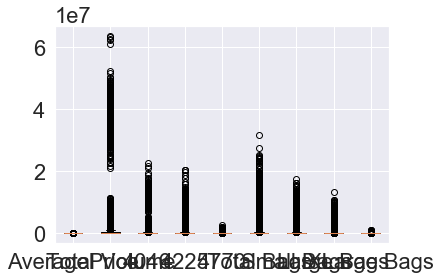

<Figure size 1440x720 with 0 Axes>

In [63]:
boxplot = plt.figure()
plt.figure(figsize = (20,0))
axes1 = boxplot.add_subplot(1,1,1)

axes1.boxplot([avocado['AveragePrice'],
              avocado['Total Volume'],
              avocado['4046'],
              avocado['4225'],
              avocado['4770'],
              avocado['Total Bags'],
              avocado['Small Bags'],
              avocado['Large Bags'],
              avocado['XLarge Bags'],
              ],
              labels = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
             )


Text(0.5, 1.0, 'Average Price vs Total Volume')

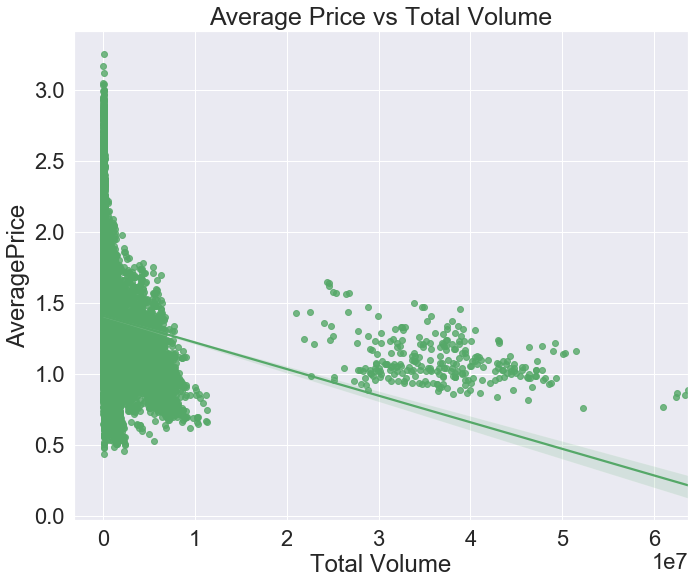

In [66]:
plt.figure(figsize=(11,9))
a=sns.regplot(x='Total Volume',y='AveragePrice',data=avocado,color='g')
plt.title('Average Price vs Total Volume',size=25)

In [78]:
names =['Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','type', 'year',
       'region', 'month', 'season', 'Day']

In [76]:
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'month', 'season', 'Day'],
      dtype='object')

KeyError: 't'

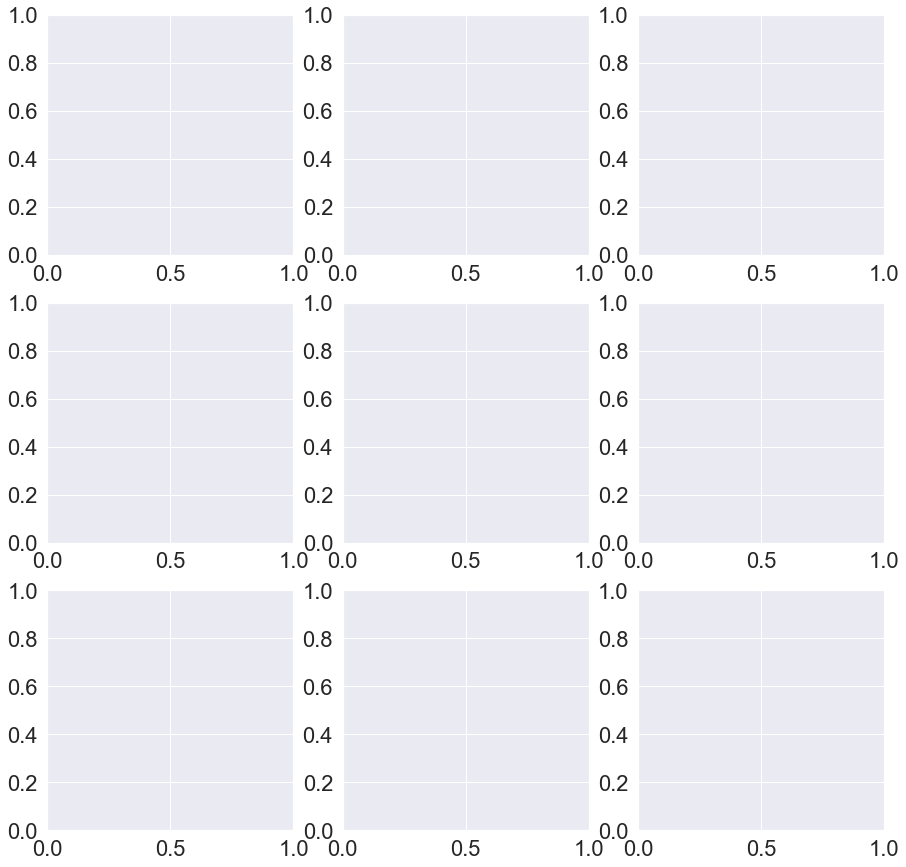

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(3,3)
fig.set_size_inches(15,15)
axes = axes.ravel()

for names,i in zip(names,range(8)):
        sns.scatterplot(X[names],y,ax=axes[i])


KeyError: 't'

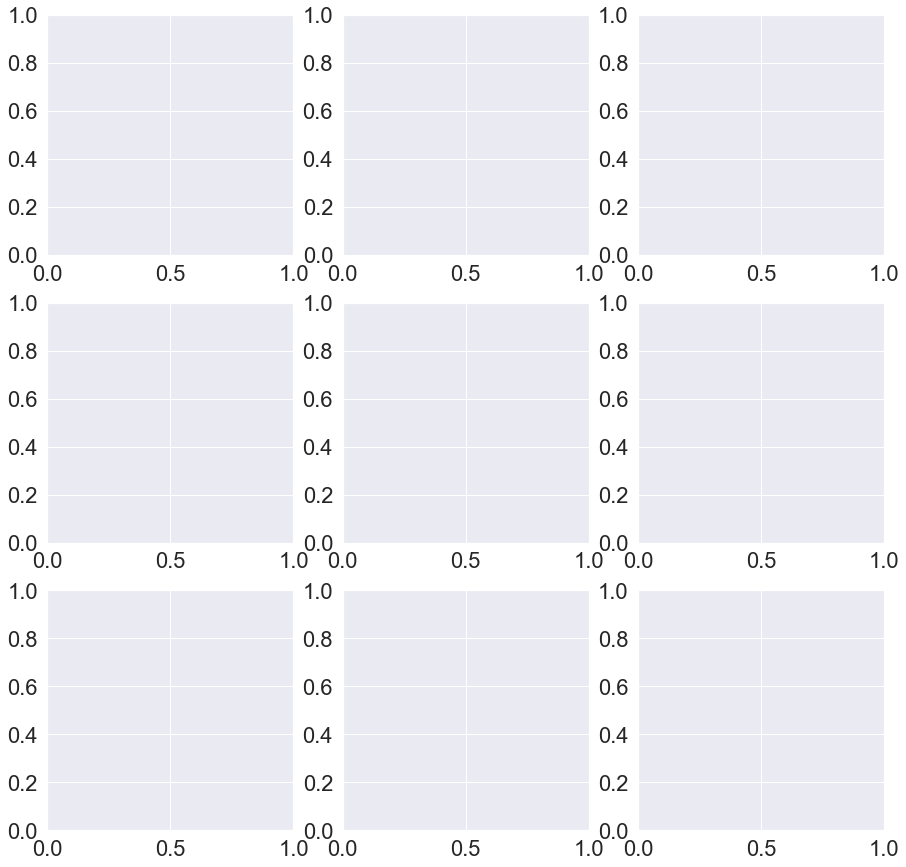

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(3,3)
fig.set_size_inches(15,15)
axes = axes.ravel()

for names,i in zip(names,range(8)):
    sns.scatterplot(X[names],ax=axes[i+1])

sns.distplot(y,ax=axes[0])

<Figure size 792x648 with 0 Axes>

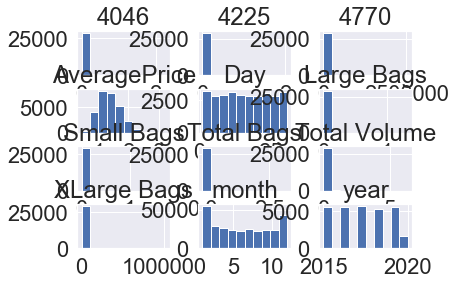

<Figure size 792x648 with 0 Axes>

In [92]:
avocado.drop("Date",axis=1).hist()

In [93]:
avocado.drop("Date",axis=1)

AttributeError: 'DataFrame' object has no attribute 'scatter'

In [89]:
avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,season,Day
0,2015-01-04,1.23,19089.36,17522.46,735.22,2.87,828.81,828.81,0.00,0.00,organic,2015,SanDiego,1,winter,4
1,2015-01-04,1.56,58065.35,10049.66,25228.37,3672.89,19114.43,17280.89,1833.54,0.00,organic,2015,Midsouth,1,winter,4
2,2015-01-04,2.01,3397.00,58.22,1493.90,772.21,1072.67,993.94,78.73,0.00,organic,2015,RaleighGreensboro,1,winter,4
3,2015-01-04,1.01,309024.22,180977.06,46253.49,12923.45,68870.22,52556.00,16314.22,0.00,conventional,2015,SouthCarolina,1,winter,4
4,2015-01-04,1.84,3966.00,244.34,2700.02,76.21,945.43,838.34,107.09,0.00,organic,2015,Nashville,1,winter,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29584,2020-04-19,1.49,26704.27,2794.47,1969.99,1.16,21938.65,9963.47,11975.18,0.00,organic,2020,PhoenixTucson,4,spring,19
29585,2020-04-19,1.53,5349.63,152.40,422.90,0.00,4774.33,4668.64,105.69,0.00,organic,2020,Jacksonville,4,spring,19
29586,2020-04-19,1.27,4665970.34,1181558.69,693066.99,227007.84,2564336.82,1904958.62,539192.24,120185.96,conventional,2020,GreatLakes,4,spring,19
29587,2020-04-19,1.73,40703.39,2792.68,5379.97,0.00,32530.74,27499.62,5031.12,0.00,organic,2020,Philadelphia,4,spring,19


In [98]:
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'month', 'season', 'Day'],
      dtype='object')

In [127]:
conti=['Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

categ=['type', 'year',
       'region', 'month', 'season', 'Day']

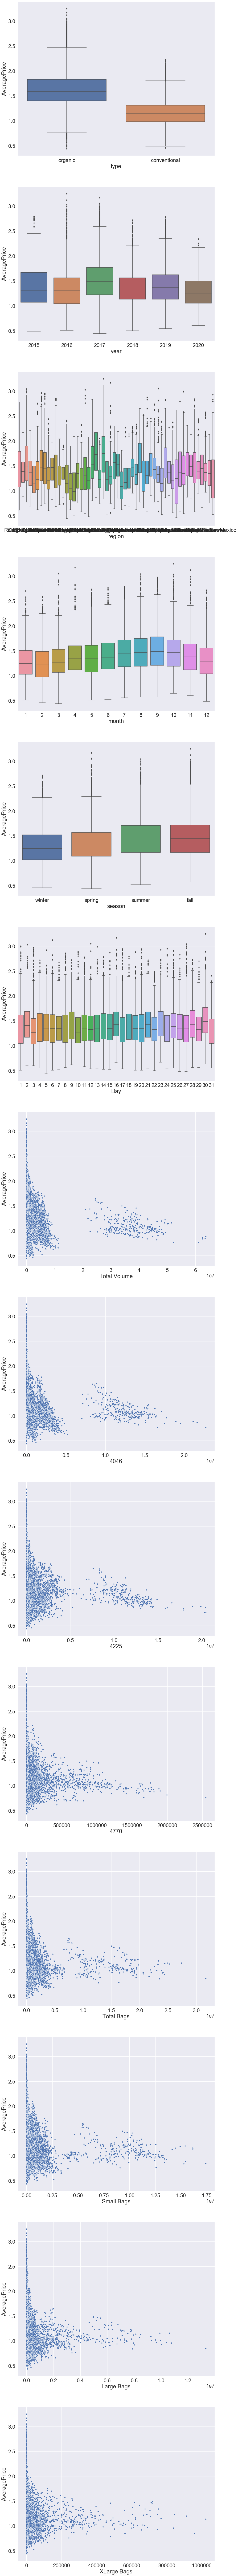

In [116]:
fig = plt.figure(figsize=(15,200))
for i in range(0,len(categ)):
    fig.add_subplot(14,1,i+1)
    sns.boxplot(x=categ[i],y='AveragePrice', data=avocado)
    
for col in conti:
    fig.add_subplot(14,1,i+2)
    sns.scatterplot(avocado[col].dropna(),y='AveragePrice',data =avocado);
    i += 1

plt.show()
fig.clear()

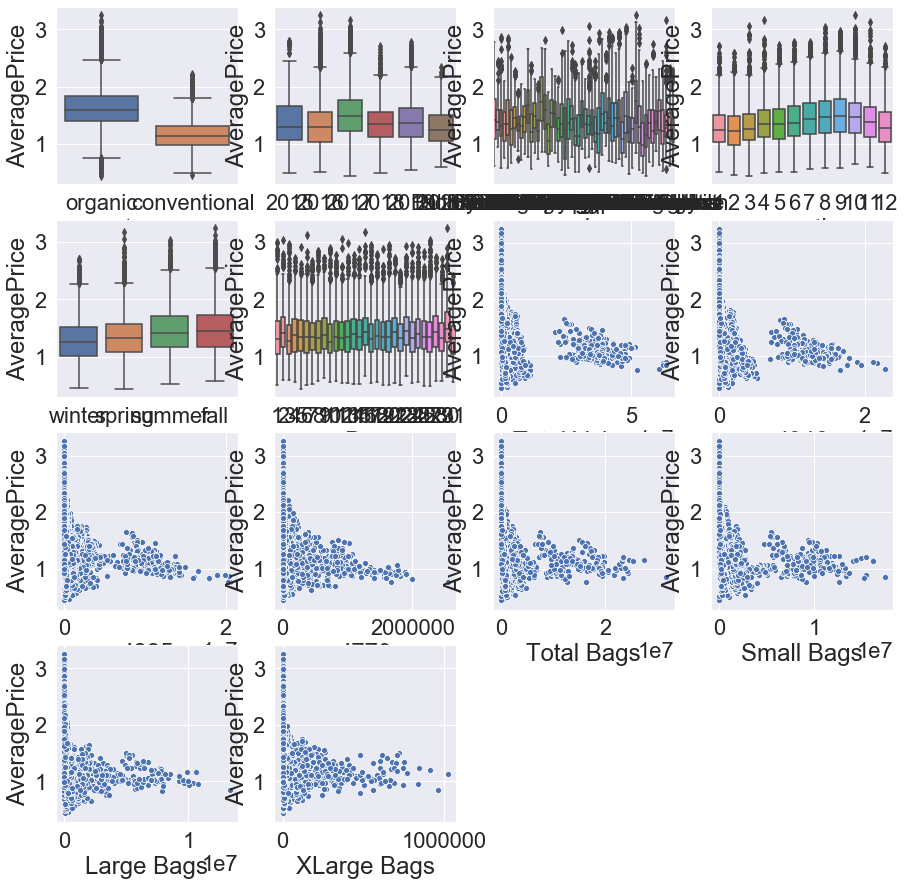

In [131]:
fig = plt.figure(figsize=(15,15))
for i in range(0,len(categ)):
    fig.add_subplot(4,4,i+1)
    sns.boxplot(x=categ[i],y='AveragePrice', data=avocado)
    
for col in conti:
    fig.add_subplot(4,4,i+2)
    sns.scatterplot(avocado[col],y='AveragePrice',data =avocado);
    i += 1

plt.show()
fig.clear()

In [129]:
import numpy as np
X_names = ['Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
# X 값 log 씌우기
for names in X_names:
    X[names] = np.log1p(X[names])
# Y 값 log 씌우기
y = np.log1p(y)

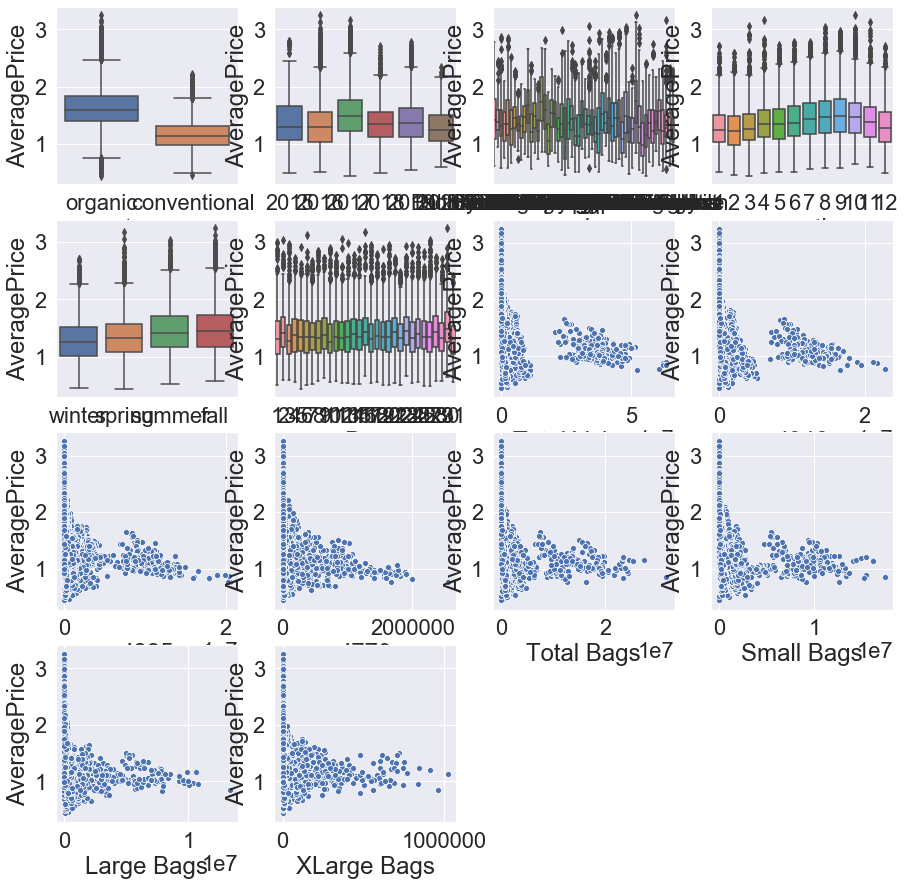

In [130]:
fig = plt.figure(figsize=(15,15))
for i in range(0,len(categ)):
    fig.add_subplot(4,4,i+1)
    sns.boxplot(x=categ[i],y='AveragePrice', data=avocado)
    
for col in X_names:
    fig.add_subplot(4,4,i+2)
    sns.scatterplot(avocado[col].dropna(),y='AveragePrice',data =avocado);
    i += 1

plt.show()
fig.clear()